In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn as skl

In [2]:
import tensorflow as tf

2022-04-07 19:20:52.000828: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-07 19:20:52.000892: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
tf.__version__

'2.8.0'

In [4]:
data_path = 'https://gitlab.com/gabriel.abellan/machine-learning-la-conga/-/raw/main/datasets/housing-data.csv'

In [5]:
df_hous = pd.read_csv(data_path)
df_hous

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900
5,1985,4,61,299900
6,1534,3,12,314900
7,1427,3,57,198999
8,1380,3,14,212000
9,1494,3,15,242500


Nos podemos preguntar cuál va a ser el precio de una casa conociendo la superficie y cuantas habitaciones tiene 

Cuando analizamos datos, nos hacemos preguntas acerca de estos

In [6]:
df_hous.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [7]:
print(df_hous.info())
print(df_hous.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sqft    47 non-null     int64
 1   bdrms   47 non-null     int64
 2   age     47 non-null     int64
 3   price   47 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB
None
              sqft      bdrms        age          price
count    47.000000  47.000000  47.000000      47.000000
mean   2000.680851   3.170213  42.744681  340412.659574
std     794.702354   0.760982  22.873440  125039.899586
min     852.000000   1.000000   5.000000  169900.000000
25%    1432.000000   3.000000  24.500000  249900.000000
50%    1888.000000   3.000000  44.000000  299900.000000
75%    2269.000000   4.000000  61.500000  384450.000000
max    4478.000000   5.000000  79.000000  699900.000000


In [8]:
df_hous['sqft']

0     2104
1     1600
2     2400
3     1416
4     3000
5     1985
6     1534
7     1427
8     1380
9     1494
10    1940
11    2000
12    1890
13    4478
14    1268
15    2300
16    1320
17    1236
18    2609
19    3031
20    1767
21    1888
22    1604
23    1962
24    3890
25    1100
26    1458
27    2526
28    2200
29    2637
30    1839
31    1000
32    2040
33    3137
34    1811
35    1437
36    1239
37    2132
38    4215
39    2162
40    1664
41    2238
42    2567
43    1200
44     852
45    1852
46    1203
Name: sqft, dtype: int64

<AxesSubplot:title={'center':'sqft'}, ylabel='Frequency'>

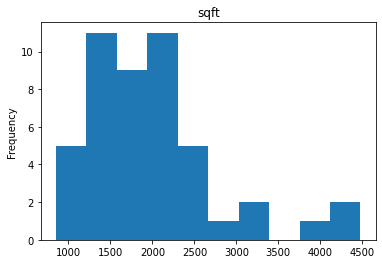

In [9]:
df_hous['sqft'].plot(kind='hist',title='sqft')

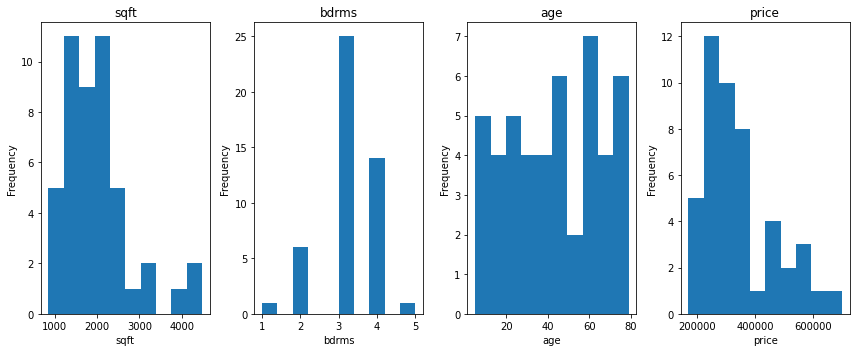

In [10]:
plt.figure(figsize=(12,5))

for (i, feature) in enumerate(['sqft', 'bdrms', 'age', 'price']):
    plt.subplot(1,4,i+1)
    df_hous[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)
    
plt.tight_layout()

Ahora, vamos a definir las variables predictores y las variables que voy a predecir $x, y$

In [11]:
x = df_hous.drop(columns=['price']) #Eliminar filas o columnas de un dataframe, metodo drop
x #Variable predictora

,sqft,bdrms,age
0,2104,3,70
1,1600,3,28
2,2400,3,44
3,1416,2,49
4,3000,4,75
5,1985,4,61
6,1534,3,12
7,1427,3,57
8,1380,3,14
9,1494,3,15


In [13]:
x = df_hous.drop(columns=['price']).values
x #variable predictora

array([[2104,    3,   70],
       [1600,    3,   28],
       [2400,    3,   44],
       [1416,    2,   49],
       [3000,    4,   75],
       [1985,    4,   61],
       [1534,    3,   12],
       [1427,    3,   57],
       [1380,    3,   14],
       [1494,    3,   15],
       [1940,    4,    7],
       [2000,    3,   27],
       [1890,    3,   45],
       [4478,    5,   49],
       [1268,    3,   58],
       [2300,    4,   77],
       [1320,    2,   62],
       [1236,    3,   78],
       [2609,    4,    5],
       [3031,    4,   21],
       [1767,    3,   44],
       [1888,    2,   79],
       [1604,    3,   13],
       [1962,    4,   53],
       [3890,    3,   36],
       [1100,    3,   60],
       [1458,    3,   29],
       [2526,    3,   13],
       [2200,    3,   28],
       [2637,    3,   25],
       [1839,    2,   40],
       [1000,    1,    5],
       [2040,    4,   75],
       [3137,    3,   67],
       [1811,    4,   24],
       [1437,    3,   50],
       [1239,    3,   22],
 

In [14]:
y = df_hous['price'].values #variable que se va a predecir

In [15]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [17]:
lin_reg = Sequential([
    Dense(1, input_shape=(3,))
])

lin_reg.compile(Adam(learning_rate=.6), 'mean_squared_error')

2022-04-07 20:11:39.689274: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-07 20:11:39.689337: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-07 20:11:39.689371: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vm-jupyter-school-2022): /proc/driver/nvidia/version does not exist
2022-04-07 20:11:39.689710: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8)

In [21]:
print(x.shape)
print(x_train.shape)

(47, 3)
(37, 3)


In [24]:
h = lin_reg.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
2/2 [==============================] - 1s 148ms/step - loss: 122104381440.0000 - val_loss: 158762713088.0000
Epoch 2/20
2/2 [==============================] - 0s 25ms/step - loss: 120314544128.0000 - val_loss: 156547596288.0000
Epoch 3/20
2/2 [==============================] - 0s 25ms/step - loss: 118692364288.0000 - val_loss: 154411040768.0000
Epoch 4/20
2/2 [==============================] - 0s 29ms/step - loss: 116934967296.0000 - val_loss: 152319180800.0000
Epoch 5/20
2/2 [==============================] - 0s 33ms/step - loss: 115370139648.0000 - val_loss: 150245769216.0000
Epoch 6/20
2/2 [==============================] - 0s 23ms/step - loss: 113701715968.0000 - val_loss: 148201209856.0000
Epoch 7/20
2/2 [==============================] - 0s 24ms/step - loss: 112115048448.0000 - val_loss: 146157813760.0000
Epoch 8/20
2/2 [==============================] - 0s 22ms/step - loss: 110552203264.0000 - val_loss: 144148234240.0000
Epoch 9/20
2/2 [==============================]

In [25]:
y_pred_train = lin_reg.predict(x_train)
y_pred_test = lin_reg.predict(x_test)

In [26]:
y_pred_test

array([[ 37920.082],
       [105324.61 ],
       [ 45053.156],
       [ 47190.754],
       [ 51860.95 ],
       [ 74538.09 ],
       [ 34574.27 ],
       [ 28300.885],
       [ 21492.875],
       [ 49258.867]], dtype=float32)

In [30]:
h = h.history

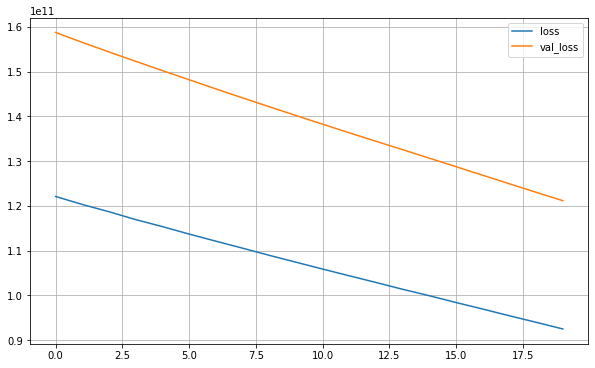

In [33]:
pd.DataFrame(h).plot(figsize=(10,6))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

Intentemos de reescalar todo (que todo este en un mismo orden de magnitud por asi decirlo)

In [34]:
from sklearn.preprocessing import MinMaxScaler 

In [37]:
df_hous['sqft'].shape

(47,)

In [38]:
df_hous['sqft'].values.reshape(-1,1)

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000],
       [1985],
       [1534],
       [1427],
       [1380],
       [1494],
       [1940],
       [2000],
       [1890],
       [4478],
       [1268],
       [2300],
       [1320],
       [1236],
       [2609],
       [3031],
       [1767],
       [1888],
       [1604],
       [1962],
       [3890],
       [1100],
       [1458],
       [2526],
       [2200],
       [2637],
       [1839],
       [1000],
       [2040],
       [3137],
       [1811],
       [1437],
       [1239],
       [2132],
       [4215],
       [2162],
       [1664],
       [2238],
       [2567],
       [1200],
       [ 852],
       [1852],
       [1203]])

In [43]:
mms = MinMaxScaler()

df_hous['sqft_mms'] = mms.fit_transform(df_hous['sqft'].values.reshape(-1,1))
df_hous['bdrms_mms'] = mms.fit_transform(df_hous['bdrms'].values.reshape(-1,1))
df_hous['age_mms'] = mms.fit_transform(df_hous['age'].values.reshape(-1,1))
df_hous['price_mms'] = mms.fit_transform(df_hous['price'].values.reshape(-1,1))

In [44]:
df_hous.describe()

,sqft,bdrms,age,price,sqft_mms,bdrms_mms,age_mms,price_mms
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574,0.316790,0.542553,0.510063,0.321722
std,794.702354,0.760982,22.873440,125039.899586,0.219168,0.190245,0.309101,0.235924
min,852.000000,1.000000,5.000000,169900.000000,0.000000,0.000000,0.000000,0.000000
25%,1432.000000,3.000000,24.500000,249900.000000,0.159956,0.500000,0.263514,0.150943
50%,1888.000000,3.000000,44.000000,299900.000000,0.285714,0.500000,0.527027,0.245283
75%,2269.000000,4.000000,61.500000,384450.000000,0.390789,0.750000,0.763514,0.404811
max,4478.000000,5.000000,79.000000,699900.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
x_mms = df_hous[['sqft_mms', 'bdrms_mms', 'age_mms']].values
y_mms = df_hous['price_mms'].values

In [47]:
x_mms_train, x_mms_test, y_mms_train, y_mms_test = train_test_split(x_mms, y_mms, train_size=.8)

In [61]:
lin_reg_mms = Sequential([
    Dense(1, input_shape=(3,))
])

lin_reg_mms.compile(Adam(learning_rate=.05), 'mean_squared_error')

In [62]:
h_mms = lin_reg_mms.fit(x_mms_train, y_mms_train, epochs=100, validation_data=(x_mms_test, y_mms_test), verbose=0)

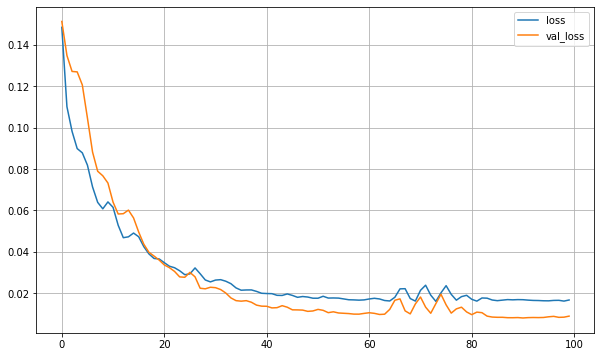

In [63]:
pd.DataFrame(h_mms.history).plot(figsize=(10,6))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

In [64]:
#Otra capa
lin_reg_mms = Sequential([
    Dense(10, input_shape=(3,), activation='relu'),
    Dense(1,)
])

lin_reg_mms.compile(Adam(learning_rate=.05), 'mean_squared_error')

In [66]:
lin_reg_mms.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                40        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [67]:
h_mms = lin_reg_mms.fit(x_mms_train, y_mms_train, epochs=100, validation_data=(x_mms_test, y_mms_test), verbose=0)

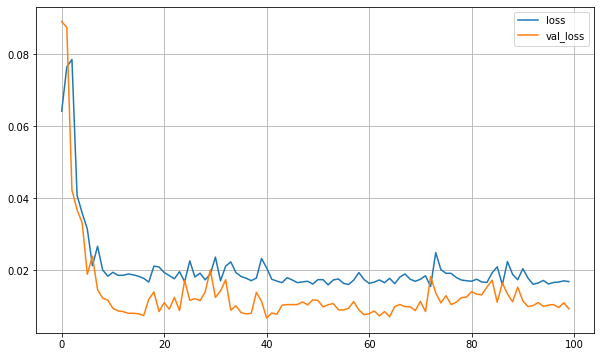

In [68]:
pd.DataFrame(h_mms.history).plot(figsize=(10,6))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

In [86]:
#Otra capa distinta
lin_reg_mms = Sequential([
    Dense(5, input_shape=(3,), activation='relu'),
    Dense(1,)
])

lin_reg_mms.compile(Adam(learning_rate=.1), 'mean_squared_error')

In [87]:
h_mms = lin_reg_mms.fit(x_mms_train, y_mms_train, epochs=100, validation_data=(x_mms_test, y_mms_test), verbose=0)

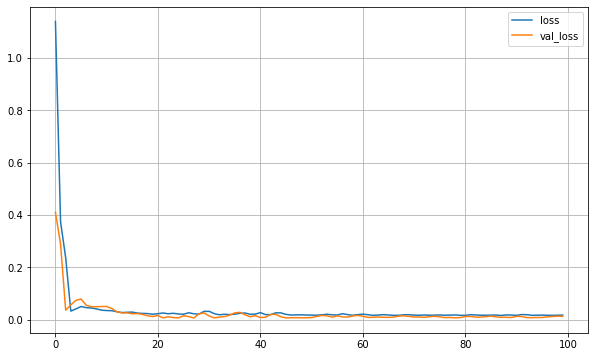

In [88]:
pd.DataFrame(h_mms.history).plot(figsize=(10,6))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()